# Project: Investigate a Dataset - [No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  This data contains 110.527 medical appointments and its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. I choose this dataset because It was interesting to me.<br><br>
**The columns are:**

> <ul>
  <li>PatientId</li>
  <li>AppointmentID</li>
  <li>Gender</li>
  <li>Age</li>
  <li>Neighbourhood</li>
      <li>Scholarship</li>
      <li>Hipertension</li>
  <li>Diabetes</li>
  <li>Alcoholism</li>
      <li>Handcap</li>
      <li>SMS_received</li>
  <li>No-show</li>
  

</ul>

### Question(s) for Analysis
> What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?
<br>

 

<a id='wrangling'></a>
## Data Wrangling





In [62]:
import pandas as pd
import matplotlib.pyplot as plot
from datetime import datetime
import seaborn as sns
%matplotlib inline 

In [63]:
#Step1: I'll load the chosen data and store it inside dataframe called df
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [64]:
#Checking the top five rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [65]:
#Find the # of rows and columns

df.shape

(110527, 14)

In [66]:
# Inspect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> We can see we have 0 null values! great.

In [67]:
# Now i'll get more information about the dataset using describe()
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>**The mean of ages is: 37 <br>
Note that age shows -1, That doesn't make any sense I should clean the data.<br>
Max age is: 115**



### Data Cleaning


In [68]:
# I'll change the '_' to '-' in SMS_received to match the '-' in No-show
df.rename(columns={'SMS_received': 'SMS-received'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS-received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [69]:
# Correcting "Hipertension" spelling 
df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS-received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [70]:
 # We had seen eralier that the min age is -1, we will collect the mean of Ages here and replace it with it
df["Age"].replace(-1,df["Age"].mean(),inplace=True)

In [71]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS-received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.089219,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


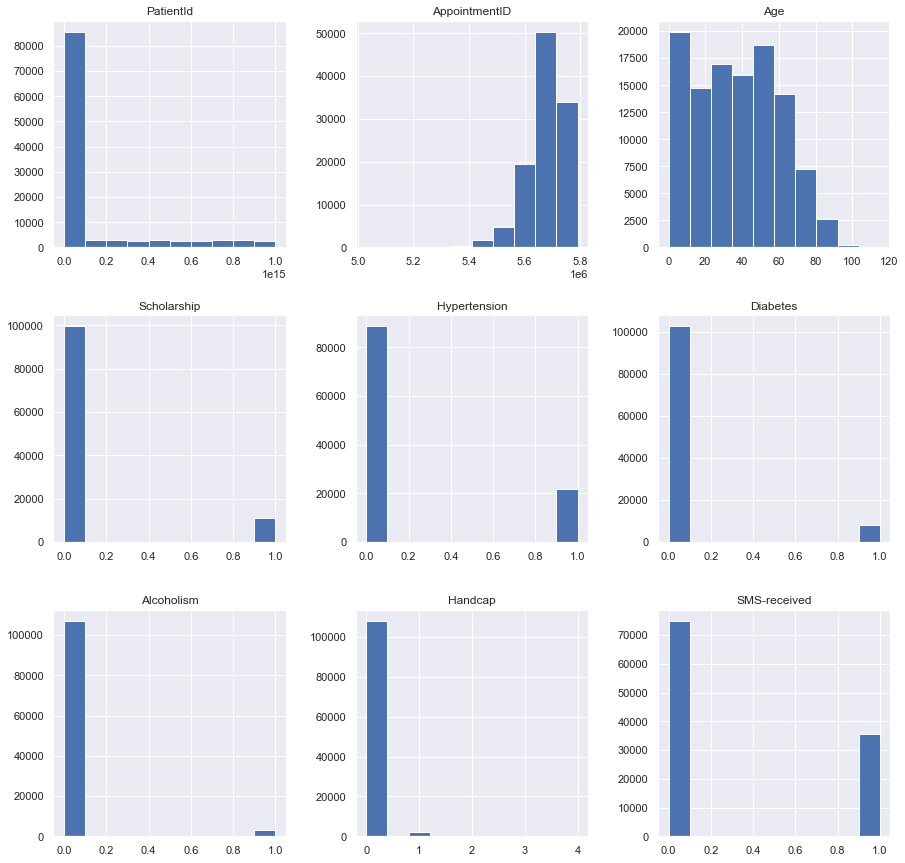

In [72]:
# I'll create a histogram to have a general view 

df.hist(figsize=(15,15));

We can see half of the patients didn't recive SMS!

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

In [73]:
# Facilitating recall by assigning Shown and Not Shown to names, and then count who showed and who didn't
Showed = (df['No-show'] == 'No').tolist()
df[Showed].count()

PatientId         88208
AppointmentID     88208
Gender            88208
ScheduledDay      88208
AppointmentDay    88208
Age               88208
Neighbourhood     88208
Scholarship       88208
Hypertension      88208
Diabetes          88208
Alcoholism        88208
Handcap           88208
SMS-received      88208
No-show           88208
dtype: int64

In [74]:
NotShowed = (df['No-show'] == 'Yes').tolist()
df[NotShowed].count()

PatientId         22319
AppointmentID     22319
Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hypertension      22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMS-received      22319
No-show           22319
dtype: int64

In [75]:
# Now I'll calculate the difference in genreal between who showed and ho didn't
CountAll = df[Showed].count() + df[NotShowed].count() # = 110527
CountShowed = df[Showed].count() - df[NotShowed].count() # = 65889
CountNotShowed= CountAll- CountShowed



In [76]:
# Store the wandted variabls inside of tuple
list_tuples = list(zip(CountAll, CountShowed))  
dframe = pd.DataFrame(list_tuples, columns=['CountAll', 'CountShowed'])  

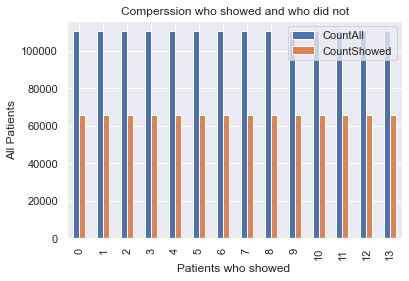

In [77]:
# Print Bar graph to compare between all the patients and the patients who showed to there appointment
dframe.reset_index().plot(
    x="index", y=["CountAll", "CountShowed"], kind="bar"
)
plot.title("Comperssion who showed and who did not")
plot.xlabel("Patients who showed ")
plot.ylabel("All Patients");

> The # of peoples showd to there appointment was about 4 times to those who didn't show

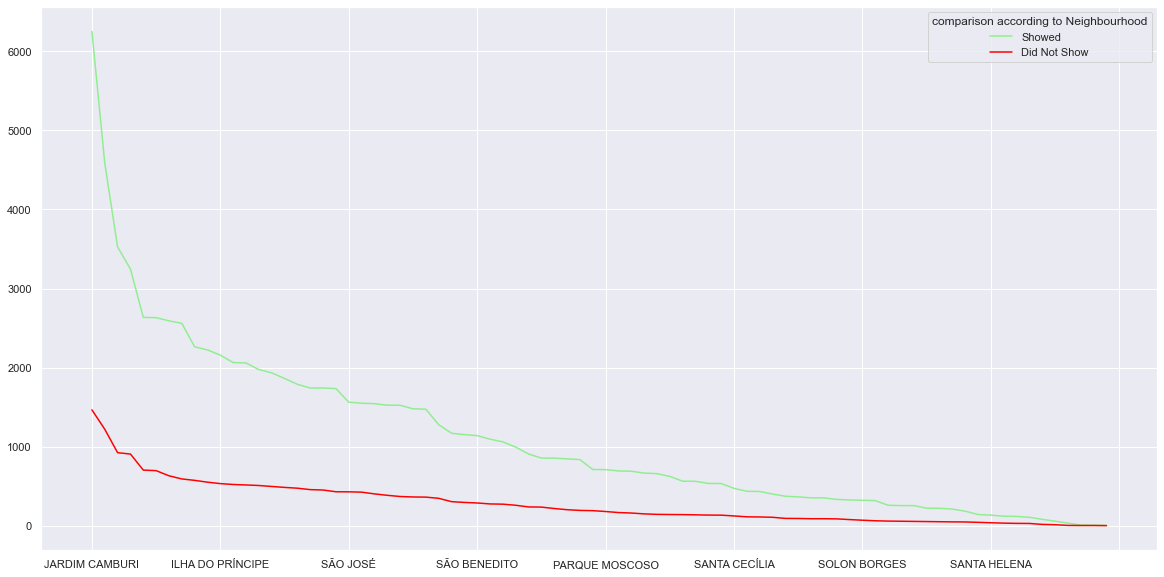

In [78]:
# comparison between who showed and who did not according to Neighbourhood   
plot.figure(figsize=[20,10])
df.Neighbourhood[Showed].value_counts().plot(kind='line',color='lightgreen')
df.Neighbourhood[NotShowed].value_counts().plot(kind='line',color='red')
plot.legend(['Showed', 'Did Not Show'], title='comparison according to Neighbourhood')
plot.show()      

> we can see patients from certains Neighbourhood showed more, but there's not enough data to determine the reason

In [79]:
# Comperssion between who showed and who did not according to gender by calculating the difference

print(df.Gender[Showed].value_counts()-df.Gender[NotShowed].value_counts())



F    42652
M    23237
Name: Gender, dtype: int64


>We can see here that females who showed to there appointment about 2 times more than males

In [80]:
#Group dataframe by the Gender  
df.groupby('Gender')['No-show'].value_counts()

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

> But we can also see that more females didn't showed to their appointment are more than males who didn't show,
so ***Gender isn't significant***

In [81]:
# Now I'll convert string to datetime to be able to decide if the appointment day is far of the scheduling day and if it's a factor
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  float64            
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS-received    110527 non-null  int64              
 13  No-show       

In [83]:
# Calculate the difference between the AppointmentDay and when was the ScheduledDay
DateDifferences = df["AppointmentDay"] - df["ScheduledDay"] 
print(DateDifferences.mean())

9 days 17:08:34.161960425


> By calculating the mean of the difference, we can say 9 days apart is a enough time to forget.

In [84]:
#A custom method to display all the required plots
def display_plot(variable,variable1, xlabel, ylabel,title):
    
    # Method will take four parameters the first two variables are for the used data
    #2nd, 3rd and 4th parameters are to determine the axes names and title 
    plot.figure(figsize=[20,10])
    variable.plot(kind='hist',color='lightgreen')
    variable1.plot(kind='hist',color='red')
    plot.legend(['Showed', 'Did Not Show'])
    plot.xlabel(' ')
    plot.ylabel('')
    plot.title('');



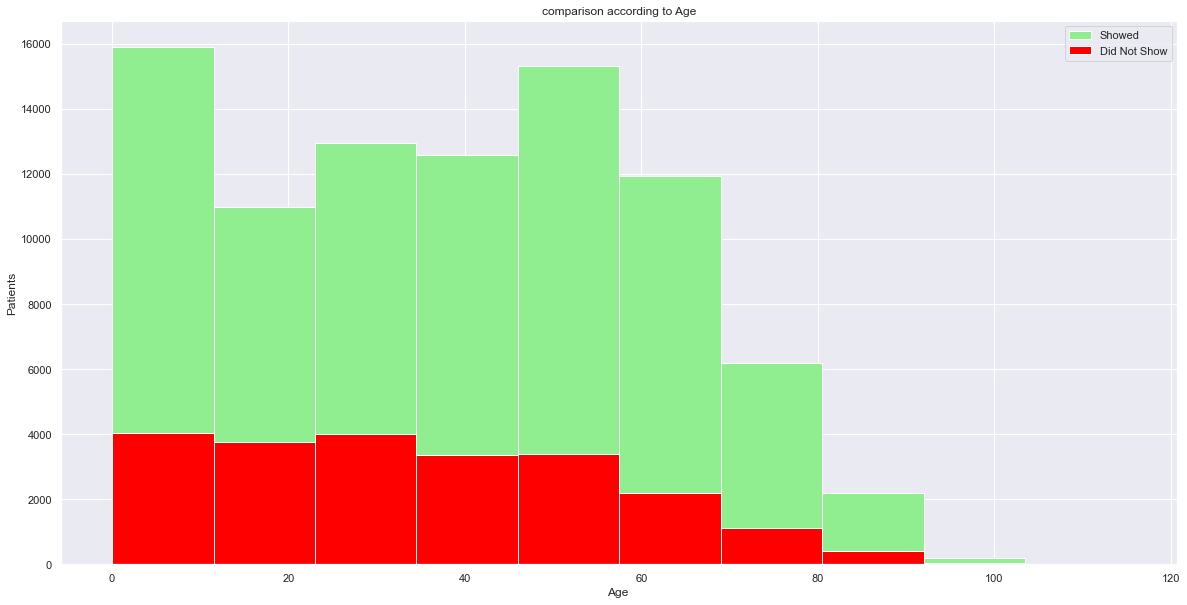

In [85]:
#Comparing who showed and who didn't according to Age
display_plot(df.Age[Showed],df.Age[NotShowed], 'Age', 'Patients', 'comparison according to Age')
plot.xlabel('Age ')
plot.ylabel('Patients')
plot.title('comparison according to Age');

> We can see that older patients didn't showed to there appointment as much younger patients did

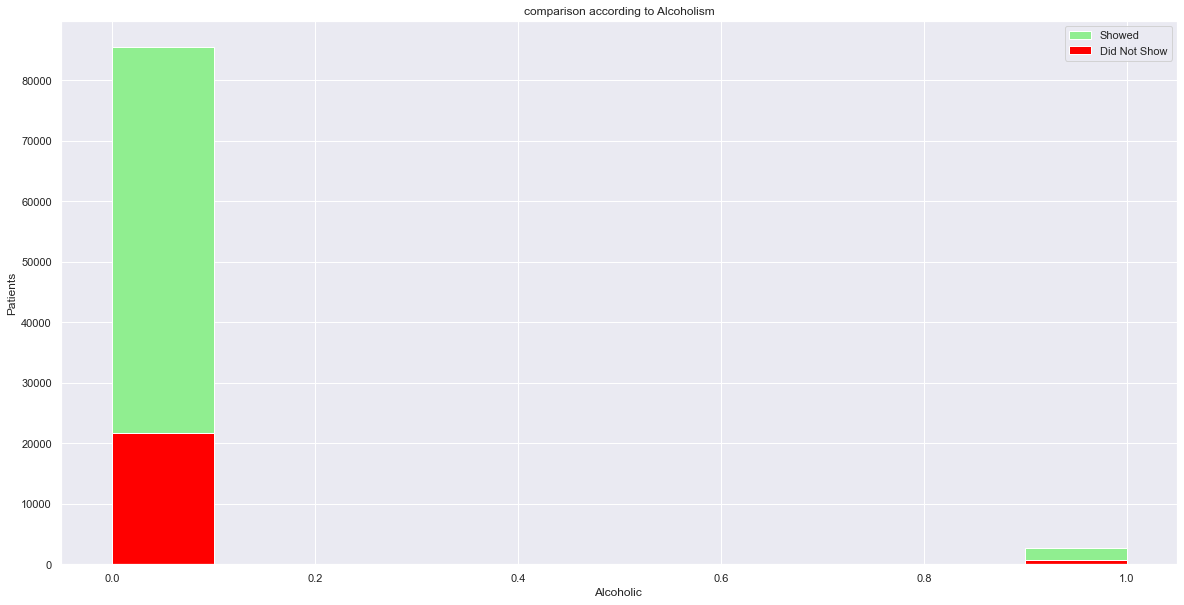

In [86]:
# comparison who showed and who did not according to Alcoholism
display_plot(df.Alcoholism[Showed],df.Alcoholism[NotShowed], 'Alcoholic', 'Patients', 'comparison according to Alcoholism')
plot.xlabel('Alcoholic ')
plot.ylabel('Patients')
plot.title('comparison according to Alcoholism');

 > being Alcoholic **isn't significant**, it's not a factor.

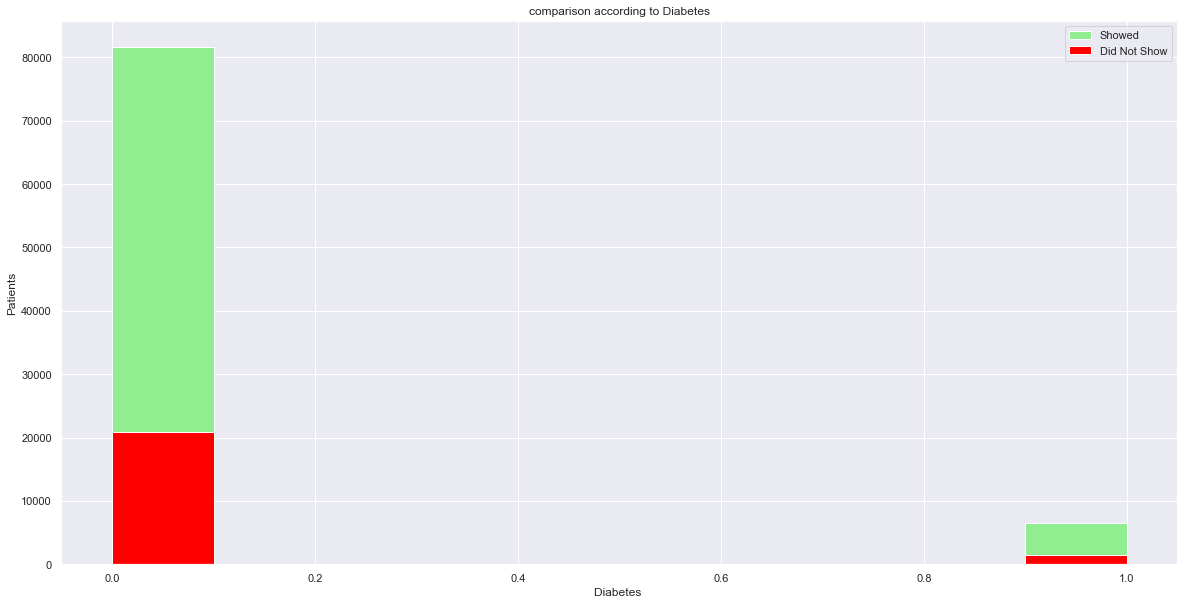

In [87]:
# comparison who showed and who did not according to Diabetes
display_plot(df.Diabetes[Showed],df.Diabetes[NotShowed], 'Diabetes', 'Patients', 'comparison according to Diabetes')
plot.xlabel('Diabetes ')
plot.ylabel('Patients')
plot.title('comparison according to Diabetes');

>   Having Diabetes **isn't significant**, it's not a factor.

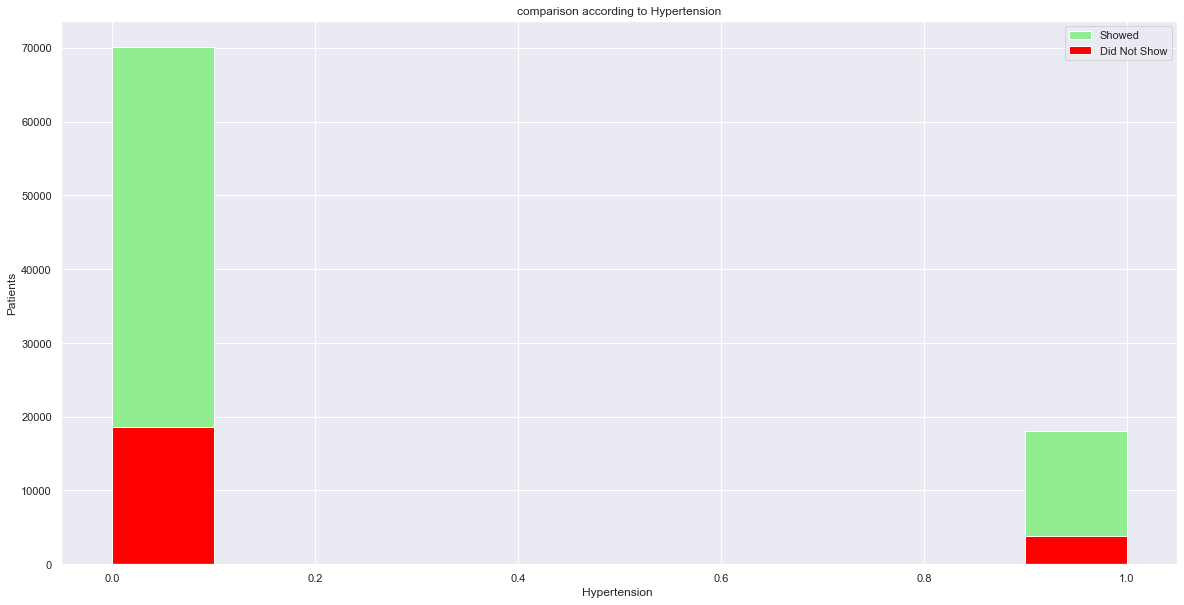

In [88]:
# comparison who showed and who did not according to Diabetes
display_plot(df.Hypertension[Showed],df.Hypertension[NotShowed], 'Hypertension', 'Patients', 'comparison according to Hypertension')
plot.xlabel('Hypertension ')
plot.ylabel('Patients')
plot.title('comparison according to Hypertension');

>   Having Hypertension **isn't significant**, it's not a factor.

<a id='conclusions'></a>
## Conclusions



<ul>
  <li>Age is an important factor, patients from 0-34 showed up most followed by patients from 35-70, The older the patients get the less they show up</li>
  <li>Neighbourhood was a strong factor to, patients from certain neighborhoods showed up more</li>
  <li>Half of the patients who showed up didn't receive an SMS which is weird</li>
      <li>There was a 9 days gap between the scheduling day and appointment day, so forgetting is a factor</li>

</ul>

<h3>Limitations </h3>

<ul>
  <li> Couldn't identify the correlation between patients who showed and who didn't and factors such diabetes, hypertension and scholarship etc.</li>
     <li> Could not detect the reason behind why patients from certain neighborhoods showed up more.</li>
  

</ul>

<h3> Referred Resources </h3>


- stackoverflow